# Exploration package ARIMA

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from US_markets.arima import *

In [3]:
data = get_data(10000)

In [4]:
df_sym, train, test, date_test = preprocess(data, 'MSFT')

In [5]:
df_sym

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
141,MSFT,2013-01-02,27.25,27.73,27.1499,27.62,24.1945,52899300,1.0
4020,MSFT,2013-01-03,27.63,27.65,27.1600,27.25,23.8704,48294400,1.0
2430,MSFT,2013-01-04,27.27,27.34,26.7300,26.74,23.4236,52521100,1.0
396,MSFT,2013-01-07,26.77,26.88,26.6400,26.69,23.3798,37110400,1.0
755,MSFT,2013-01-08,26.75,26.79,26.4600,26.55,23.2572,44703100,1.0
...,...,...,...,...,...,...,...,...,...
575,MSFT,2018-01-18,89.80,90.67,89.6600,90.10,90.1000,22931303,1.0
904,MSFT,2018-01-19,90.14,90.61,89.6600,90.00,90.0000,34896964,1.0
2740,MSFT,2018-01-22,90.00,91.62,89.7400,91.61,91.6100,23190700,1.0
3647,MSFT,2018-01-23,91.90,92.30,91.5400,91.90,91.9000,23013991,1.0


In [6]:
train.shape, test.shape

((1262,), (13,))

In [7]:
best_order = get_best_model(df_sym, train)

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 

In [8]:
best_order

(1, 1, 1)

In [9]:
model = ARIMA(train, order=best_order).fit()

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
len_test = len(test)

In [11]:
forecast, stderr, conf_int = forecast(model, len_test)

In [12]:
accuracy = forecast_accuracy(forecast, test)

/home/juliend/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [13]:
accuracy

{'mape': 0.026203685240756544,
 'me': -2.372001109528094,
 'mae': 2.372001109528094,
 'mpe': -0.026203685240756544,
 'rmse': 2.7831695879413076,
 'acf1': 0.6527454625159766,
 'corr': 0.9502274465165417,
 'minmax': 0.026203685240756558}

In [14]:
import matplotlib.pyplot as plt

forecast.index = test.index
conf_int.index = test.index

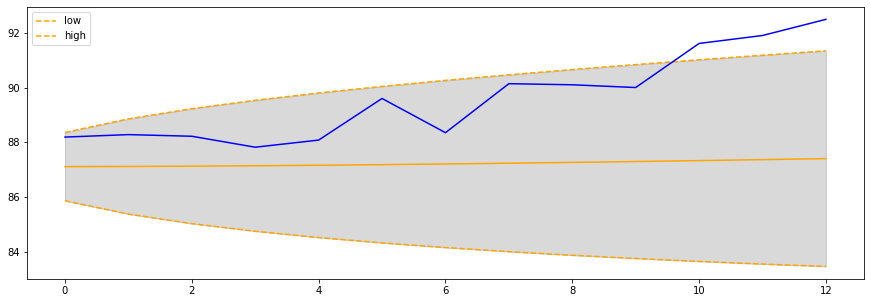

In [15]:
plt.figure(figsize=(15,5))
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(test, c='blue')
plt.legend()
plt.fill_between(test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15)

In [16]:
data2 = get_data()

In [17]:
df_sym, train, test, date_test = preprocess(data2, 'MSFT')

In [18]:
df_sym

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
141,MSFT,2013-01-02,27.25,27.73,27.1499,27.62,24.1945,52899300,1.0
4020,MSFT,2013-01-03,27.63,27.65,27.1600,27.25,23.8704,48294400,1.0
2430,MSFT,2013-01-04,27.27,27.34,26.7300,26.74,23.4236,52521100,1.0
396,MSFT,2013-01-07,26.77,26.88,26.6400,26.69,23.3798,37110400,1.0
755,MSFT,2013-01-08,26.75,26.79,26.4600,26.55,23.2572,44703100,1.0
...,...,...,...,...,...,...,...,...,...
19459789,MSFT,2018-12-24,97.68,97.97,93.9800,94.13,93.7276,43935192,1.0
19459378,MSFT,2018-12-26,95.14,100.69,93.9600,100.56,100.1301,51634793,1.0
19459410,MSFT,2018-12-27,99.30,101.19,96.4000,101.18,100.7475,49498509,1.0
19459961,MSFT,2018-12-28,102.09,102.41,99.5200,100.39,99.9609,38169312,1.0
